# Figure creation

Now that I've collected data from the simulations, I should create some figures

### Setup

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random
import sys
%matplotlib inline 
import sqlite3 as lite

### Figure testing

Just trying some things with pyplot

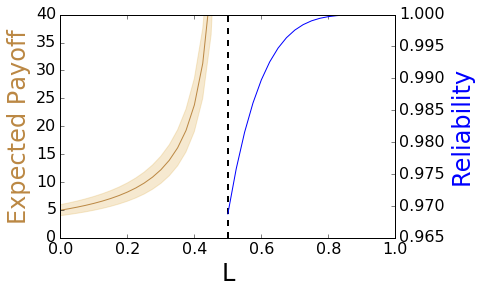

In [2]:
#just some test data for now
x_sub = np.arange(0,.5,.025)
y_sub = 1/(1-2*x_sub+.01) * 5
stdev_sub = y_sub/5
x_super = np.arange(.5,1,.025)
reliability = 1 - (1-x_super)**5
y_super = 1/(2*x_super-1+.01) * 5
stdev_super = y_super/5

plt.plot(x_sub,y_sub,color='#bb8844')
plt.fill_between(x_sub,y_sub+stdev_sub,y_sub-stdev_sub,color='#ddaa44',alpha=0.25)
plt.axis([0, 1, 0, 40])
plt.xlabel('L',fontsize=24)
plt.tick_params(labelsize=16)
plt.ylabel('Expected Payoff',color='#bb8844',fontsize=24)
plt.tick_params(labelsize=16)

l = plt.axvline(x=0.5, color='#000000',lw=2,linestyle='dashed')

ax2 = plt.gca().twinx()
ax2.plot(x_super, reliability, 'b')
plt.ylabel('Reliability', color='b',fontsize=24)
plt.tick_params(labelsize=16)

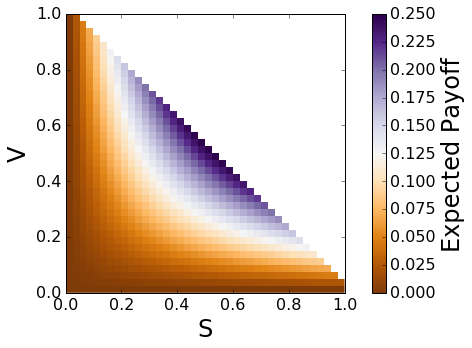

In [41]:
#just some test data for now
i,j = np.indices((40,40))
S_coord = i/40
V_coord = j/40
payoff = S_coord*V_coord
payoff[i > 40-j] = np.nan

fig, ax = plt.subplots(figsize=(10,5))
c = ax.imshow(payoff,cmap=plt.cm.PuOr,extent=(0,1,0,1),origin='lower',interpolation='none')
plt.xlabel('S',fontsize=24)
plt.tick_params(labelsize=16)
plt.ylabel('V',fontsize=24)
plt.tick_params(labelsize=16)

cbar = fig.colorbar(c)
cbar.ax.set_ylabel('Expected Payoff',fontsize=24)
cbar.ax.tick_params(labelsize=16)

### Reading from SQL database

In [7]:
def get_data(cmd):
    con = lite.connect('sim.db')
    with con:
        cur = con.cursor()
        cur.execute(cmd)
        results = cur.fetchall()
        for i in results:
            print(i)
    con.close()

In [8]:
get_data('select * from sim_types')

(1, 'Monte Lab Infinite', 'max_cards', 'stat_weight', 'fraction_labs', None, None, 2)
(2, 'Monte Lab Finite', 'deck_size', 'stat_weight', 'num_labs', None, None, 2)
(3, 'Monte Village/Smithy Infinite', 'max_cards', 'stat_weight', 'fraction_villages', 'fraction_smithies', None, 3)
(4, 'Monte Herald Infinite', 'max_cards', 'stat_weight', 'fraction_heralds', None, None, 2)
(5, 'Markov Lab Infinite', 'max_cards', 'fraction_labs', None, None, None, 2)
(6, 'Markov Lab Finite', 'deck_size', 'num_labs', None, None, None, 2)
(7, 'Markov Village/Smithy Infinite', 'max_cards', 'max_actions', 'fraction_village', 'fraction_smithies', None, 3)


In [25]:
get_data('select count(*),p0 from sim_results where sim_type_id=7 and deleted=0 group by p0')

(5807, 1000.0)
(820, 2000.0)


### Creating figures

In [48]:
#automatically update simFigures module
if 'simFigures' in sys.modules:
    del sys.modules['simFigures'] 
from simFigures import *

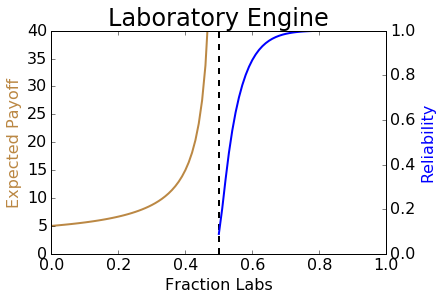

In [35]:
lab_sim_fig()

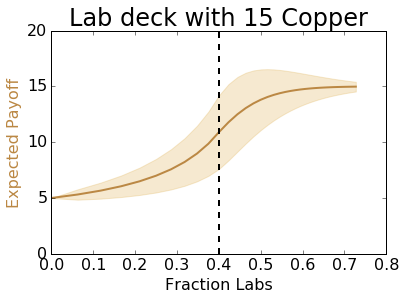

In [49]:
lab_fin_fig()

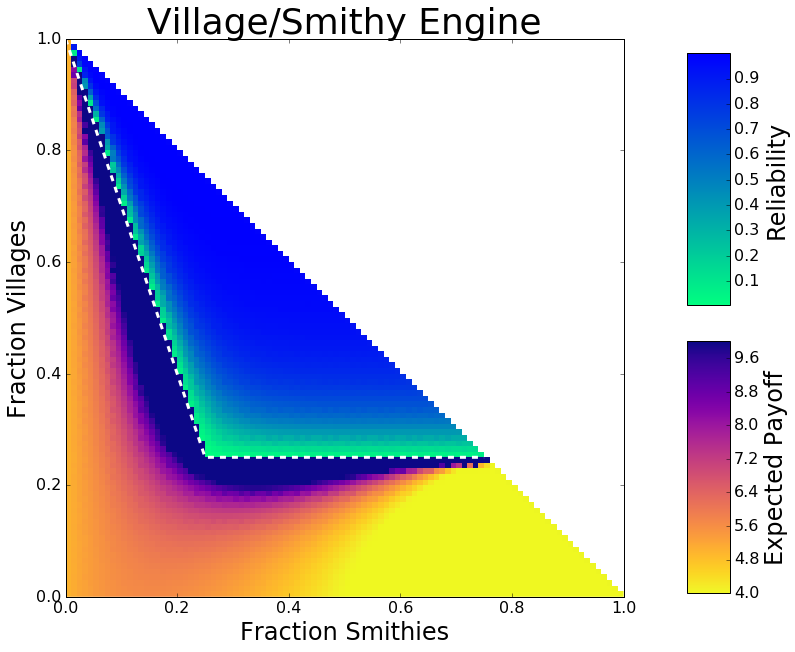

In [43]:
vsm_sim_fig()